<a href="https://colab.research.google.com/github/kaviarasu4/NM-project-/blob/main/Nan%20mudhalvan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow version: 2.18.0
x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.8742 - loss: 0.4224 - val_accuracy: 0.9802 - val_loss: 0.0639
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.9833 - loss: 0.0532 - val_accuracy: 0.9900 - val_loss: 0.0393
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9890 - loss: 0.0375 - val_accuracy: 0.9890 - val_loss: 0.0403
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.9902 - loss: 0.0296 - val_accuracy: 0.9867 - val_loss: 0.0473
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.9928 - loss: 0.0225 - val_accuracy: 0.9922 - val_loss: 0.0305
313/313 - 2s - 7ms/step - accuracy: 0.9913 - loss: 0.0295

Test accuracy: 99.13%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step

Predictions for the first 5 test images:
Image 1: Predicted digit = 7, True digit = 7


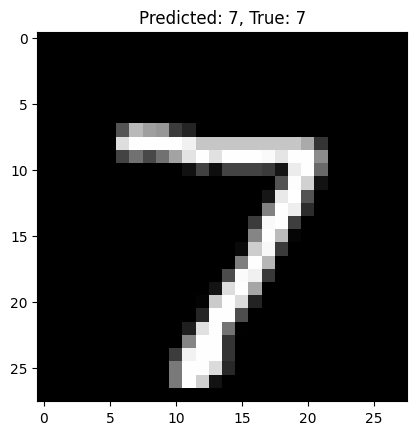

Image 2: Predicted digit = 2, True digit = 2


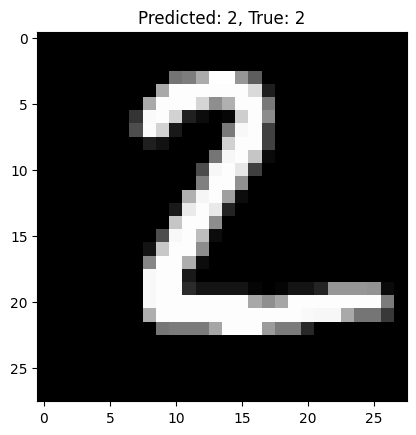

Image 3: Predicted digit = 1, True digit = 1


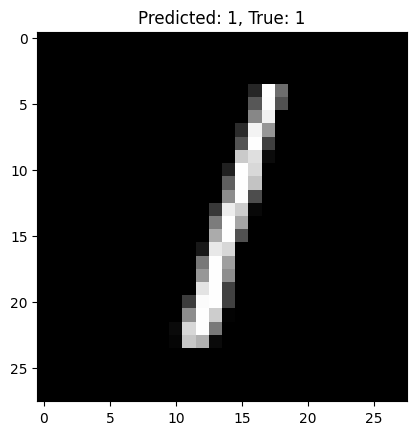

Image 4: Predicted digit = 0, True digit = 0


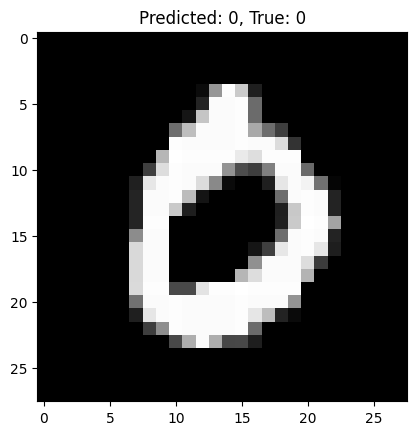

Image 5: Predicted digit = 4, True digit = 4


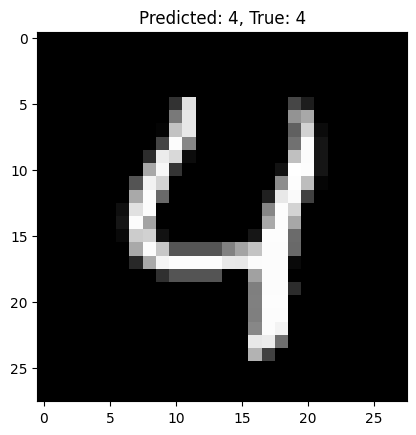

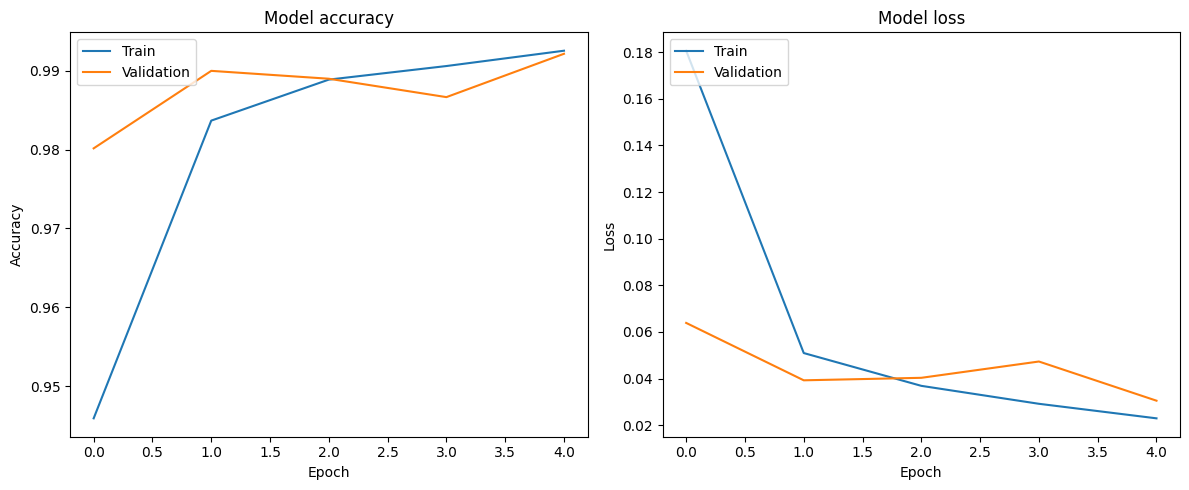

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(f"TensorFlow version: {tf.__version__}")

# --- 1. Load and Prepare the Dataset ---
# The MNIST dataset is included with Keras and can be easily loaded.
# It contains 60,000 training images and 10,000 testing images of handwritten digits (0-9).
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the image data to a range of [0, 1].
# This is a crucial preprocessing step for neural networks.
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape the data to include a channel dimension.
# For grayscale images like MNIST, the channel dimension is 1.
# CNNs expect input in the format (batch_size, height, width, channels).
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# --- 2. Build the Convolutional Neural Network (CNN) Model ---
# We'll use a sequential model, which is a linear stack of layers.
model = keras.Sequential([
    # Convolutional Layer 1:
    # 32 filters, each 3x3. 'relu' activation for non-linearity.
    # 'input_shape' is specified only for the first layer.
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Max Pooling Layer 1:
    # Reduces spatial dimensions (2x2 pool size) to downsample and reduce computation.
    keras.layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 2:
    # 64 filters, each 3x3.
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # Max Pooling Layer 2:
    keras.layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 3:
    # 64 filters, each 3x3.
    keras.layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten Layer:
    # Flattens the 3D output of the convolutional layers into a 1D vector
    # so it can be fed into the dense (fully connected) layers.
    keras.layers.Flatten(),

    # Dense (Fully Connected) Layer 1:
    # 64 neurons. 'relu' activation.
    keras.layers.Dense(64, activation='relu'),

    # Output Layer:
    # 10 neurons, one for each digit (0-9).
    # 'softmax' activation is used for multi-class classification,
    # as it outputs probabilities for each class that sum up to 1.
    keras.layers.Dense(10, activation='softmax')
])

# --- 3. Compile the Model ---
# Configure the model for training.
model.compile(optimizer='adam', # Adam optimizer is a good default choice.
              loss='sparse_categorical_crossentropy', # Appropriate for integer labels (0-9).
              metrics=['accuracy']) # We want to monitor accuracy during training.

# Print a summary of the model's architecture.
model.summary()

# --- 4. Train the Model ---
# 'epochs' determines how many times the model will iterate over the entire training dataset.
# 'batch_size' determines the number of samples per gradient update.
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# --- 5. Evaluate the Model ---
# Evaluate the trained model on the test dataset to assess its generalization performance.
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {accuracy*100:.2f}%")

# --- 6. Make Predictions ---
# Predict the class probabilities for a few test images.
predictions = model.predict(x_test[:5]) # Predict for the first 5 test images

print("\nPredictions for the first 5 test images:")
for i, pred in enumerate(predictions):
    predicted_digit = np.argmax(pred) # Get the digit with the highest probability
    true_digit = y_test[i]
    print(f"Image {i+1}: Predicted digit = {predicted_digit}, True digit = {true_digit}")

    # Optional: Display the image
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_digit}, True: {true_digit}")
    plt.show()

# --- 7. Plot Training History (Optional) ---
# Visualize how loss and accuracy changed during training.
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()